Parsed with column specification:
cols(
  Area = col_double(),
  MajorAxisLength = col_double(),
  MinorAxisLength = col_double(),
  Eccentricity = col_double(),
  ConvexArea = col_double(),
  Extent = col_double(),
  Perimeter = col_double(),
  Class = col_character()
)



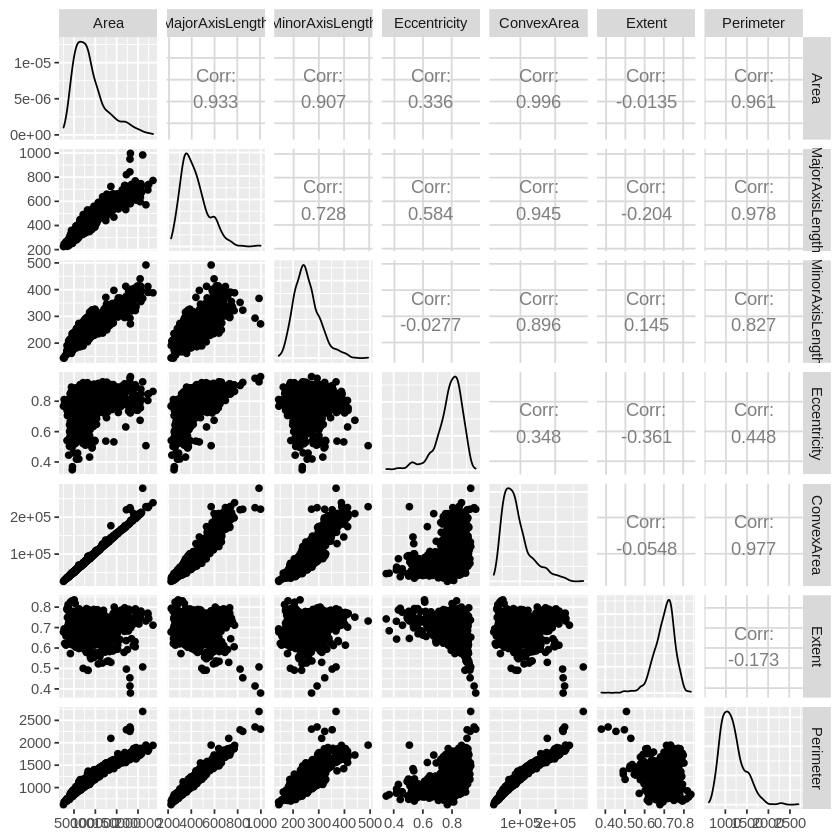

In [18]:
# downloading libraries
library(tidyverse)
library(repr)
library(GGally)
library(broom)
options(repr.matrix.max.rows = 6)

# seed value
set.seed(5805)

# ggpairs
raisin_data <- read_csv("https://github.com/dylankim990/DSCI100_Group_2/raw/main/data/Raisin_Dataset.csv") %>% 
    mutate(Class = as_factor(Class))

scaled_raisin_data <- raisin_data %>%
    select(Area:Perimeter) %>%
    mutate(across(everything(), scale))

raisin_data <- raisin_data %>%
    select(Area:Perimeter)
raisin_pairs <- raisin_data %>%
    ggpairs()

raisin_pairs

[1] "hello world"


Parsed with column specification:
cols(
  Area = col_double(),
  MajorAxisLength = col_double(),
  MinorAxisLength = col_double(),
  Eccentricity = col_double(),
  ConvexArea = col_double(),
  Extent = col_double(),
  Perimeter = col_double(),
  Class = col_character()
)

Warning message:
“Problem with `mutate()` input `raisin_clusts`.
ℹ did not converge in 10 iterations
ℹ Input `raisin_clusts` is `list(kmeans(scaled_raisin_data, nstart = 100, k))`.
ℹ The error occurred in row 9.”
Warning message:
“did not converge in 10 iterations”
Warning message:
“Problem with `mutate()` input `raisin_clusts`.
ℹ did not converge in 10 iterations
ℹ Input `raisin_clusts` is `list(kmeans(scaled_raisin_data, nstart = 100, k))`.
ℹ The error occurred in row 9.”
Warning message:
“did not converge in 10 iterations”
Warning message:
“Problem with `mutate()` input `raisin_clusts`.
ℹ did not converge in 10 iterations
ℹ Input `raisin_clusts` is `list(kmeans(scaled_raisin_data, nstart = 100, k))`.
ℹ The error oc

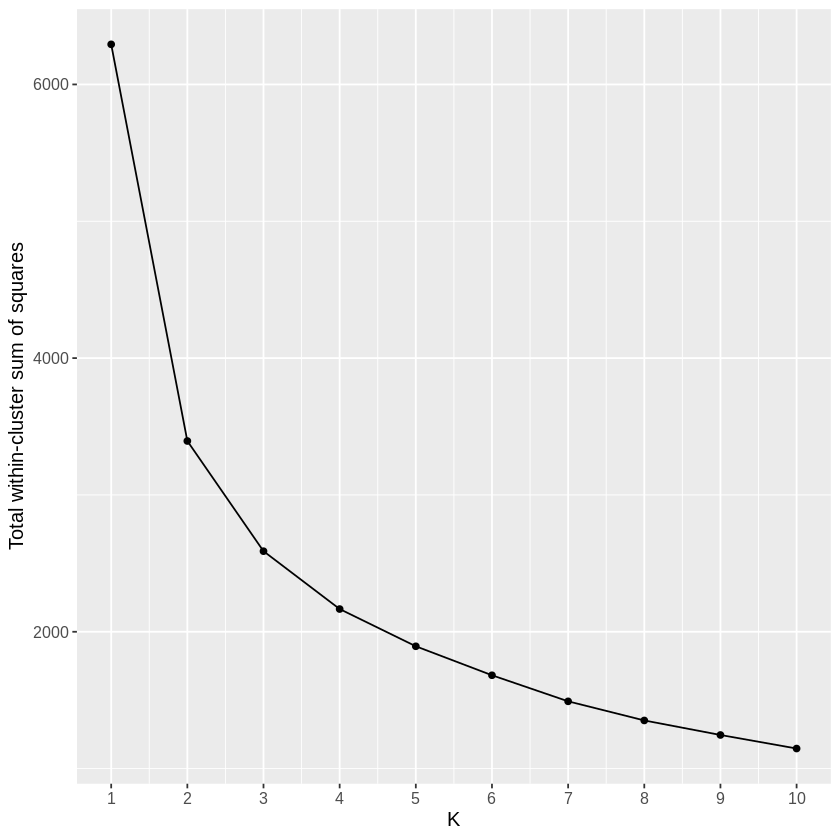

In [5]:
# downloading libraries
library(tidyverse)
library(repr)
library(GGally)
library(broom)
options(repr.matrix.max.rows = 6)

raisin_data <- read_csv("https://github.com/dylankim990/DSCI100_Group_2/raw/main/data/Raisin_Dataset.csv")
   
raisin_data <- raisin_data %>%
    mutate(Class = as_factor(Class))

scaled_raisin_data <- raisin_data %>%
    select(Area:Perimeter) %>%
    mutate(across(everything(), scale))

elbow_stats <- tibble(k = 1:10) %>%
    rowwise() %>%
    mutate(raisin_clusts = list(kmeans(scaled_raisin_data, nstart = 100, k)),
           glanced = list(glance(raisin_clusts))) %>%
    unnest(glanced)

raisin_elbow_plot <- ggplot(elbow_stats, aes(x = k, y = tot.withinss)) +
  geom_point() +
  geom_line() +
  xlab("K") +
  ylab("Total within-cluster sum of squares") +
  scale_x_continuous(breaks = 1:10) +
  theme(text = element_text(size = 12))

raisin_elbow_plot

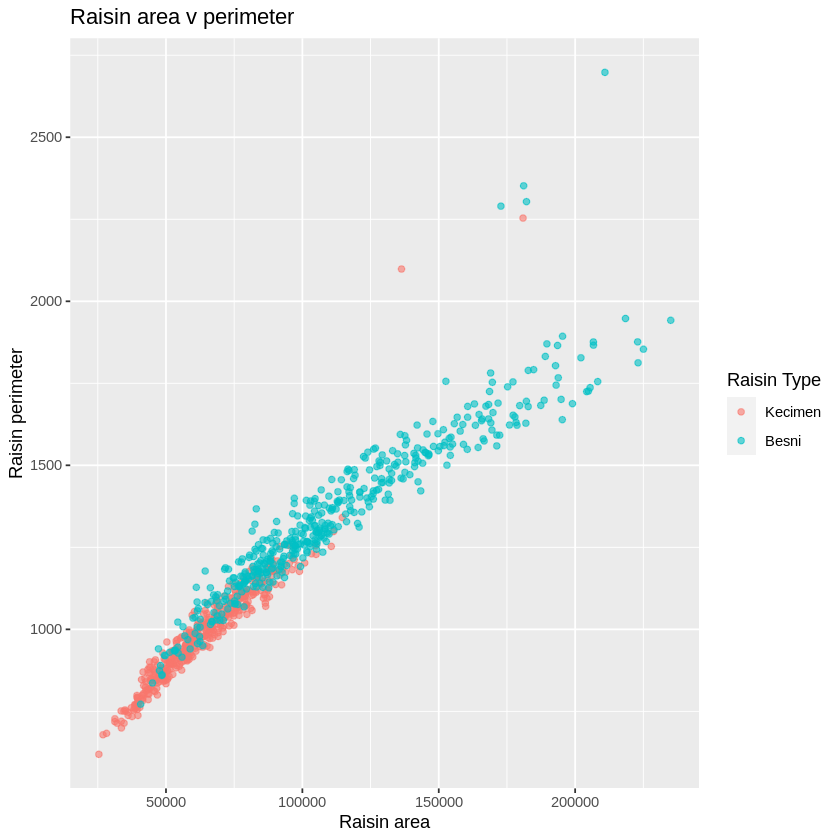

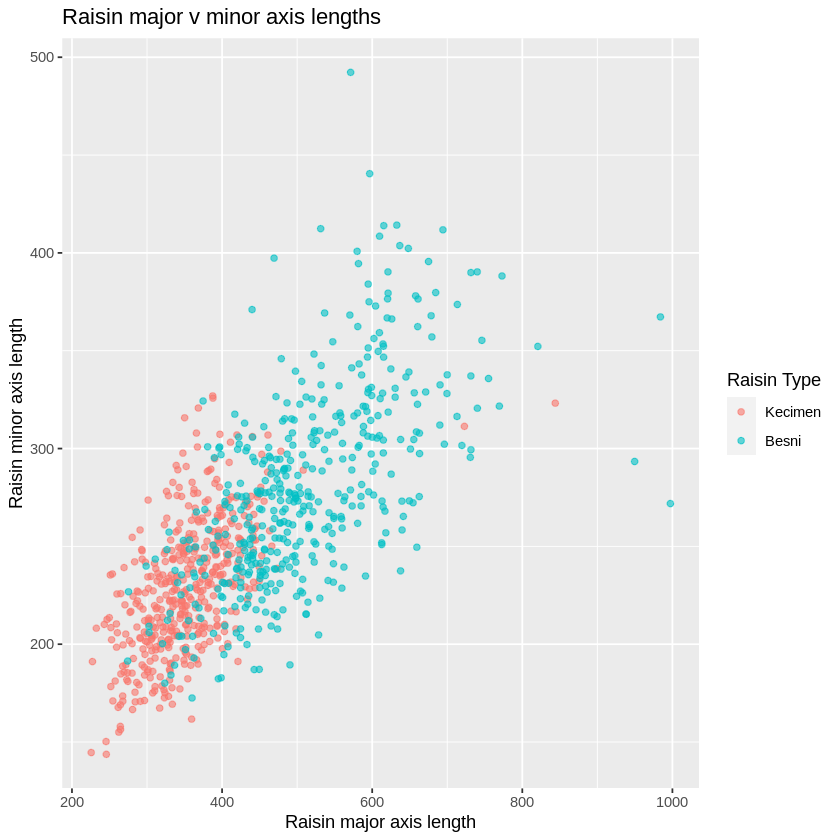

In [12]:
# downloading libraries
library(tidyverse)
library(repr)
library(GGally)
library(broom)
options(repr.matrix.max.rows = 6)

# setting seed
set.seed(5805)

# scatter plot: Area v Perimeter
area_perimeter_plot <- raisin_data %>%
    ggplot(aes(x = Area, y = Perimeter, color = Class)) + 
    geom_point(alpha = 0.6) + 
    labs(x = "Raisin area", 
         y = "Raisin perimeter", 
         title = "Raisin area v perimeter",
         color = "Raisin Type")

area_perimeter_plot

# scatter plot: MajorAxisLength v MinorAxisLength
major_minor_plot <- raisin_data %>%
    ggplot(aes(x = MajorAxisLength, y = MinorAxisLength, color = Class)) + 
    geom_point(alpha = 0.6) + 
    labs(x = "Raisin major axis length", 
         y = "Raisin minor axis length", 
         title = "Raisin major v minor axis lengths",
         color = "Raisin Type")

major_minor_plot


ERROR: Error in eval(expr, envir, enclos): object 'raisin_final_clusters_plot' not found
